## <b>Machine Learning</b> <i>Iris</i><br> Nonlinear SVM Classifier

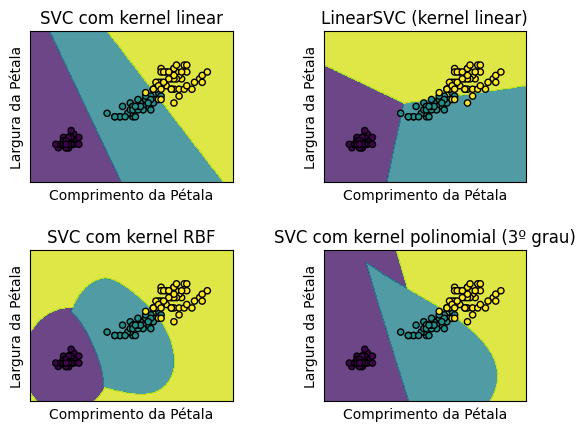

In [ ]:
# bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def criar_grade(x, y, h=0.02):
    """ Cria uma grade para plotagem """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    x2, y2 = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    return x2, y2

def plotar_limites(ax, classificador, x2, y2, **parametros):
    """Colore os limites de cada classe"""
    Z = classificador.predict(np.c_[x2.ravel(), y2.ravel()])
    Z = Z.reshape(x2.shape)
    saida = ax.contourf(x2, y2, Z, **parametros)

    return saida

# carrega base de dados iris
iris = datasets.load_iris()

# seleciona coluna das larguras e comprimento de pétalas
X = iris.data[:, 2:4]
y = iris.target

# instancia o SVM e ajusta os dados
C = 1.0

modelos = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
modelos = (classificador.fit(X, y) for classificador in modelos)

# Títulos dos gráficos
titulos = (
    "SVC com kernel linear",
    "LinearSVC (kernel linear)",
    "SVC com kernel RBF",
    "SVC com kernel polinomial (3º grau)",
)

# Configurar uma grade 2x2 para plotagem
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.45, hspace=0.45)

X0, X1 = X[:, 0], X[:, 1]
x2, y2 = criar_grade(X0, X1)

# para cada modelo, gere um gráfico
for classificador, titulo, ax in zip(modelos, titulos, sub.flatten()):
    plotar_limites(ax, classificador, x2, y2, cmap=plt.cm.viridis, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.viridis, s=20, edgecolors="k")
    ax.set_xlim(x2.min(), x2.max())
    ax.set_ylim(y2.min(), y2.max())
    ax.set_xlabel("Comprimento da Pétala")
    ax.set_ylabel("Largura da Pétala")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(titulo)

#plt.savefig("comparativo.png", dpi=300)
plt.show()